* INFO: relative error in inf-norm *
       leapfrogadvect method: 0.0645
* INFO: relative error in two-norm *
leapfrogadvect method: 0.0721


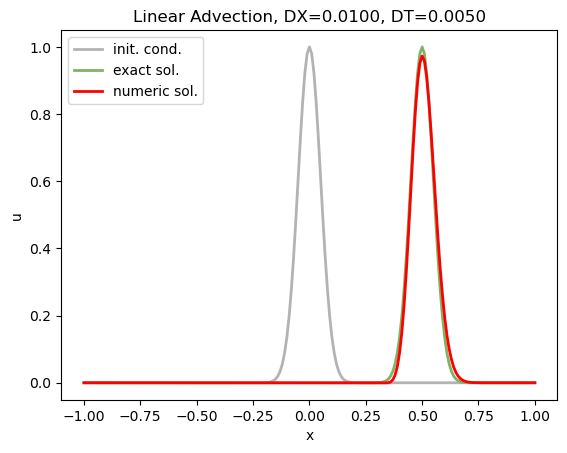

In [4]:
#!/usr/bin/env python3
# -- coding: utf-8 --
"""
Created on Sun Apr 21 08:12:53 2024

@author: macbook
"""
# Exercise 3.  (Implementation of Leap-Frog Scheme)

from numpy import arange, pi, exp, cos, inf
from numpy.linalg import norm
import matplotlib.pyplot as plt
from numpy import arange
#--We define the centered-time centered-space function for solving the PDE
def leapfrogadvect(x, dt, T, rho0):
    # Compute spatial step size
    dx = x[1] - x[0]
    
    # Initial condition; set up future time array
    u0 = rho0.copy()
    u1 = u0.copy()
    nu = dt / dx
    u_minus = u0.copy()     #--to represent the previous time step
    a = 0.05                #--the Asselin Filter parameter
    # Time loop
    for t in arange(0, T + dt, dt):
        u1[1:(len(x) - 1)] = u_minus[1:(len(x) - 1)] - nu * (u0[2:len(x)] - u0[0:(len(x) - 2)])
        u1[0] = u_minus[0] - nu * (u0[1] - u0[len(x) - 1])
        u1[len(x) - 1] = u0[len(x) - 1] - nu * (u0[0] - u0[len(x) - 2])
        u_minus = u0.copy() + a * (u1 - 2 * u0 + u_minus)   #--we use this to stabilize the scheme
        u0 = u1.copy()
        
    # Set output value
    rho = u1
    return rho

from numpy import pi, exp, cos
def init1(x):
    u0 = exp(-(20 * x)**2/2)
    return u0
def init2(x):
    sigm = 0.1; Ka = pi/sigm
    u0 = exp(-(x*2)/(2*sigm*2)) * cos(Ka*x)
    return u0

def testlf():
    %matplotlib inline
 #-- initial values/settings
    dx= 1./100.
    courant= 0.5
    dt= courant* dx
    Tend= .5
    x= arange(-1,1+dx,dx)
 #-- initial conditions
    u0 = init1(x)
 #- spatial step size
 #- Courant No.
 #- time step size
 #- final time
 #- spatial grid
 #-- centered-time centered-space advection scheme
    uctcs = leapfrogadvect(x,dt,Tend,u0)
 #-- compute exact solution to compare with
    uexact = init1(x-Tend)
 #-- plot the result, the initial condition, and the exact solution
    fig = plt.figure(1)
    h1=plt.plot(x,u0,linewidth=2, c=[0.7, 0.7, 0.7], label='init. cond.')
    h2=plt.plot(x,uexact,linewidth=2, c=[0.5, 0.7, 0.4], label='exact sol.')
    h3=plt.plot(x,uctcs,linewidth=2, c='red', label='numeric sol.')
    plt.legend(loc='upper left')
    plt.title('Linear Advection, DX=' + '%6.4f' % (dx) + ', DT=' + '%6.4f' % (dt))
    plt.xlabel('x')
    plt.ylabel('u')
 #-- compute error norms
    infctcs= norm((uexact-uctcs),inf)/norm(uexact,inf)
    print('* INFO: relative error in inf-norm *')
    print('       leapfrogadvect method: ' + '%6.4f' % (infctcs))
    twoctcs= norm((uexact-uctcs))/norm(uexact)
    print('* INFO: relative error in two-norm *')
    print('leapfrogadvect method: ' + '%6.4f' % (twoctcs))
    plt.show()

if __name__=="__main__":
    testlf()